In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv("madfhantr.csv")

In [3]:
data.shape

(614, 13)

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preprocessing

In [5]:
#dropping Loan_ID as it is not useful in predicting the loan
data.drop('Loan_ID', axis=1, inplace=True)

In [6]:
#identifying missing values
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Counting the values for categorical columns

In [7]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
#Now we will impute the missing values

In [13]:
data['Gender'] = data['Gender'].fillna('Male')
data['Married'] = data['Married'].fillna('Yes')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [14]:
#Now we will map categorical features with the integers

In [15]:
for i in [data]:
    i['Gender']=i['Gender'].map({'Male':0, 'Female':1}).astype(int)
    i['Married']=i['Married'].map({'No':0, 'Yes':1}).astype(int)
    i['Education']=i['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(int)
    i['Self_Employed'] = i['Self_Employed'].map({'No':0, 'Yes':1}).astype(int)
    i['Credit_History'] = i['Credit_History'].astype(int)

In [16]:
for i in [data]:
    i['Property_Area']=i['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2})
    i['Dependents']=i['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [17]:
data['Loan_Status'] = data['Loan_Status'].map({'N':0, 'Y':1}).astype(int)

Exploratory Data Analysis

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

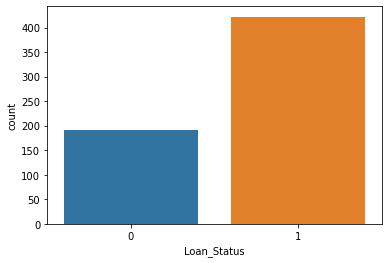

In [18]:
sns.countplot('Loan_Status', data = data)

In [19]:
# So we can see here more loans are approved as compared to rejected

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

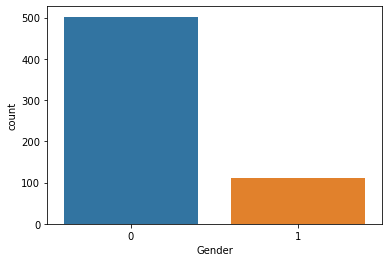

In [20]:
sns.countplot('Gender', data = data )

In [21]:
#So there are more male applicants than female

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

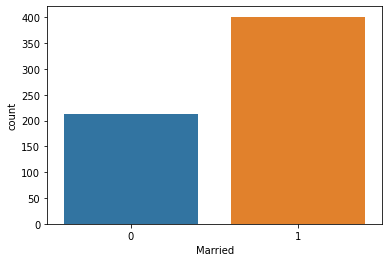

In [22]:
sns.countplot('Married', data = data )

In [23]:
# So married applicants are more than unmarried

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

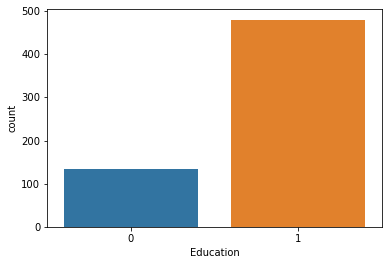

In [24]:
sns.countplot('Education', data = data )

In [25]:
# So graduates are more than non-graduate

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

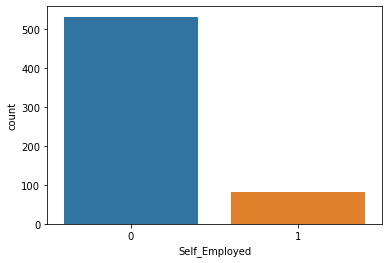

In [26]:
sns.countplot('Self_Employed', data = data)

In [27]:
# So self employed are lesser.

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

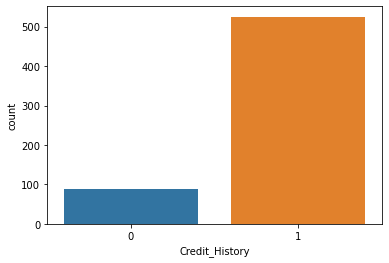

In [28]:
sns.countplot('Credit_History', data = data )

In [29]:
# More people have past credit history

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

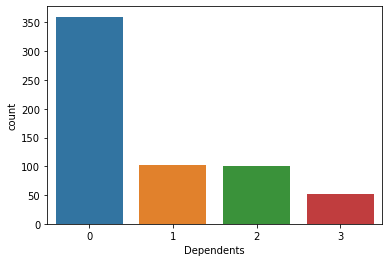

In [30]:
sns.countplot('Dependents', data = data )

Splitting the data

In [31]:
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

In [32]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2)

In [33]:
X_train.shape

(491, 11)

In [34]:
X_test.shape

(123, 11)

# Logistic Regression 

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),('log_reg', lr)])

In [36]:
model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

Testing

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc)
print('Testing accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[15 21]
 [ 1 86]]
Testing AUC: 77.1711 %
Testing accuracy: 82.1138 %


In [38]:
print(classification_report(y_test, y_test_hat, digits=4))

              precision    recall  f1-score   support

           0     0.9375    0.4167    0.5769        36
           1     0.8037    0.9885    0.8866        87

    accuracy                         0.8211       123
   macro avg     0.8706    0.7026    0.7318       123
weighted avg     0.8429    0.8211    0.7960       123



# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

Testing

In [40]:
y_predict_rf = rf_clf.predict(X_test)
accuracy_score(y_test,y_predict_rf)

0.7967479674796748

In [41]:
print('Confusion matrix:\n', confusion_matrix(y_test, y_predict_rf))
print(classification_report(y_test, y_predict_rf, digits=4))

Confusion matrix:
 [[16 20]
 [ 5 82]]
              precision    recall  f1-score   support

           0     0.7619    0.4444    0.5614        36
           1     0.8039    0.9425    0.8677        87

    accuracy                         0.7967       123
   macro avg     0.7829    0.6935    0.7146       123
weighted avg     0.7916    0.7967    0.7781       123



In [42]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predict_rf))

ACCURACY OF THE MODEL:  0.7967479674796748


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [48]:
dt = DecisionTreeClassifier(max_depth=3)
dt_model = dt.fit(X_train, y_train)

Visualize the tree

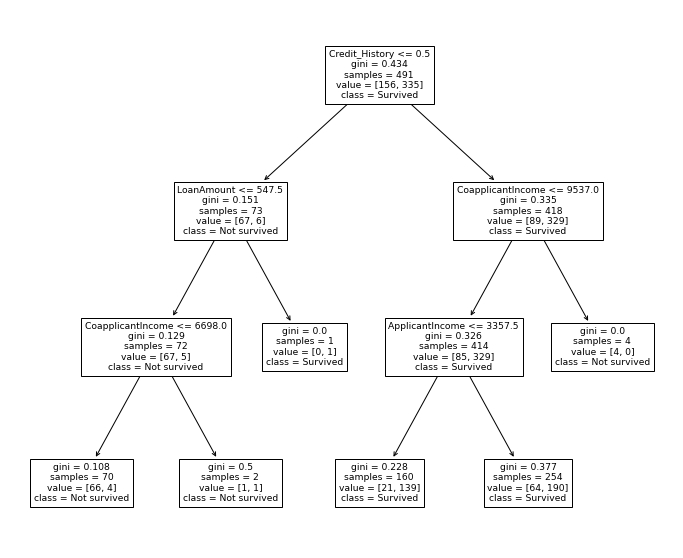

In [49]:
fig = plt.figure(figsize=(12, 10))
tree.plot_tree(dt_model, feature_names=list(X.columns), class_names=['Not survived', 'Survived'])
plt.show()

Testing the accuracy

In [50]:
y_predict_dt = dt.predict(X_test)
accuracy_score(y_test,y_predict_dt)

0.8130081300813008

In [51]:
print('Confusion matrix:\n', confusion_matrix(y_test, y_predict_dt))
print(classification_report(y_test, y_predict_dt, digits=4))

Confusion matrix:
 [[15 21]
 [ 2 85]]
              precision    recall  f1-score   support

           0     0.8824    0.4167    0.5660        36
           1     0.8019    0.9770    0.8808        87

    accuracy                         0.8130       123
   macro avg     0.8421    0.6968    0.7234       123
weighted avg     0.8254    0.8130    0.7887       123

